In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10)

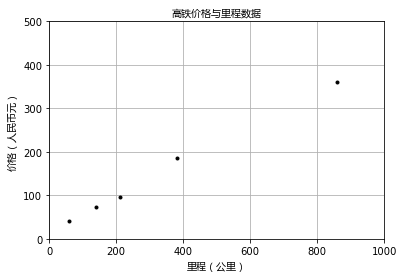

In [3]:
def generateplt():
    plt.figure()
    plt.title('高铁价格与里程数据',fontproperties=font)
    plt.xlabel('里程（公里）',fontproperties=font)
    plt.ylabel('价格（人民币元）',fontproperties=font)
    plt.axis([0, 1000, 0, 500])
    plt.grid(True)
    return plt

plt = generateplt()
X = [[60], [140], [210], [380], [860]]
y = [[42], [72], [96], [186], [360]]
plt.plot(X, y, 'k.')
plt.show()

上图中，'x'轴表示行驶里程（公里），'y'轴表示高铁票价（人民币元）。能够看出，高铁票价与行驶里程正相关，这与我们的日常经验也比较吻合，票价自然是越远越贵。下面我们就用scikit-learn来构建模型。

In [8]:
from sklearn.linear_model import LinearRegression
# 创建并拟合模型
model = LinearRegression()
model.fit(X, y)
print('预测一张600公里里程的高铁票的价格：￥%.0f' % model.predict([600])[0])
print('预测一张600公里里程的高铁票的价格：￥%.0f' % model.predict([720])[0])

预测一张600公里里程的高铁票的价格：￥260
预测一张600公里里程的高铁票的价格：￥308


C:\Users\lymanZHANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\lymanZHANG\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


一元线性回归假设解释变量和响应变量之间存在线性关系；这个线性模型所构成的空间是一个超平面（hyperplane）。超平面是n维欧氏空间中余维度等于一的线性子空间，如平面中的直线、空间中的平面等，总比包含它的空间少一维。在一元线性回归中，一个维度是响应变量，另一个维度是解释变量，总共两维。因此，其超平面只有一维，就是一条线。

上述代码中sklearn.linear_model.LinearRegression类是一个估计器（estimator）。

估计器依据观测值来预测结果。在scikit-learn里面，所有的估计器都带有fit()和predict()方法。

fit()用来分析模型参数，predict()是通过fit()算出的模型参数构成的模型，对解释变量进行预测获得的值。

因为所有的估计器都有这两种方法，所有scikit-learn很容易实验不同的模型。

LinearRegression类的fit()方法学习下面的一元线性回归模型：
y = a + bx

y表示响应变量的预测值，本例指高铁票价格预测值，是解释变量，本例指高铁行驶里程。截距和相关系数是线性回归模型最关心的事情。下图中的直线就高铁行驶里程与票价的线性关系。用这个模型，你可以计算不同里程的高铁票的价格，600公里票价为￥260元，720公里的票价为￥308元。

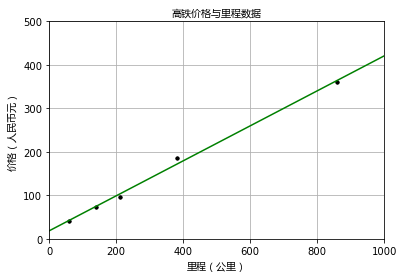

In [16]:
plt = generateplt()
plt.plot(X, y, 'k.')
X2 = [[0], [180], [360], [600], [720], [850], [1000]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
plt.show()

一元线性回归拟合模型的参数估计常用方法是普通最小二乘法（ordinary least squares ）或线性最小二乘法（linear least squares）。首先，我们定义出拟合代价函数，然后对参数进行数理统计。

### 带代价函数的模型拟合评估

下图是由若干参数生成的回归直线。如何判断哪一条直线才是最佳拟合呢？

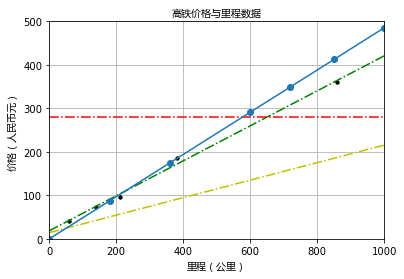

In [18]:
plt = generateplt()
plt.plot(X, y, 'k.')
y3 = [280, 280, 280, 280, 280, 280, 280]
y4 = y2 * 0.5 + 5
model.fit(X[1:-1], y[1:-1])
y5 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-.')
plt.plot(X2, y3, 'r-.')
plt.plot(X2, y4, 'y-.')
plt.plot(X2, y5, 'o-')
plt.show()

代价函数（cost function）也叫损失函数（loss function），用来定义模型与观测值的误差。模型预测的价格与训练集数据的差异称为残差（residuals）或训练误差（training errors）。后面我们会用模型计算测试集，那时模型预测的价格与测试集数据的差异称为预测误差（prediction errors）或训练误差（test errors）。

模型的残差是训练样本点与线性回归模型的纵向距离，如下图所示：

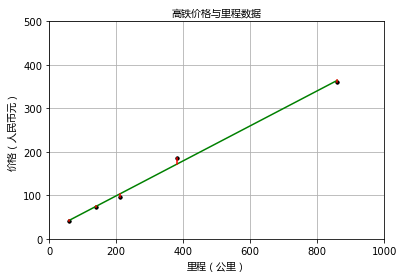

In [22]:
plt = generateplt()
plt.plot(X, y, 'k.')
X2 = [[60], [140], [210], [380], [860]]
model = LinearRegression()
model.fit(X, y)
y2 = model.predict(X2)
plt.plot(X, y, 'k.')
plt.plot(X2, y2, 'g-')
# 残差预测值
yr = model.predict(X)
for idx, x in enumerate(X):
    plt.plot([x, x], [y[idx], yr[idx]], 'r-')
    
plt.show()

我们可以通过残差之和最小化实现最佳拟合，也就是说模型预测的值与训练集的数据最接近就是最佳拟合。对模型的拟合度进行评估的函数称为残差平方和（residual sum of squares）代价函数。就是让所有训练数据与模型的残差的平方之和最小化，如下所示：

![costFunctionFomula](https://github.com/lymanzhang/Machine-Learning-for-Design/blob/master/Session02_SupervisiedLearning/img_LinearRegression/ml4d_costFunctionForumula.JPG)

其中，y<sub>i</sub>是观测值，f(x<sub>i</sub>)是预测值。

残差平方和计算如下：

import numpy as np
print('残差平方和: %.2f' % np.mean((model.predict(X) - y) ** 2))

有了代价函数，就要使其最小化获得参数。

### 解一元线性回归的最小二乘法

通过成本函数最小化获得参数，我们先求相关系数b。按照频率论的观点，我们首先需要计算x的方差和x与y的协方差。
方差是用来衡量样本分散程度的。如果样本全部相等，那么方差为0。方差越小，表示样本越集中，反正则样本越分散。方差计算公式如下：

![]()

其中， xbar是直径的均值， x<sub>i</sub>的训练集的第i个里程样本， n是样本数量。计算如下：

In [24]:
# 如果是Python2，加from __future__ import division
xbar = (60 + 140 + 210 + 380 + 860) / 5
variance = ((60 - xbar)**2 + (140 - xbar)**2 + (210 - xbar)**2 + (380 - xbar)**2 + (860 - xbar)**2) / 4
print(variance)

101700.0


Numpy里面有var方法可以直接计算方差，ddof参数是贝塞尔(无偏估计)校正系数（Bessel's correction），设置为1，可得样本方差无偏估计量。

In [25]:
print(np.var([60, 140, 210, 380, 860], ddof=1))

101700.0


协方差表示两个变量的总体的变化趋势。如果两个变量的变化趋势一致，也就是说如果其中一个大于自身的期望值，另外一个也大于自身的期望值，那么两个变量之间的协方差就是正值。 如果两个变量的变化趋势相反，即其中一个大于自身的期望值，另外一个却小于自身的期望值，那么两个变量之间的协方差就是负值。如果两个变量不相关，则协方差为0，变量线性无关不表示一定没有其他相关性。协方差公式如下：

![]()

其中，xbar是直径的均值，x<sub>i</sub>的训练集的第i个里程样本，ybar是价格的均值，y<sub>i</sub>的训练集的第i个票价样本，n是样本数量。计算如下：

In [28]:
ybar = (42 + 72 + 96 + 186 + 360) / 5
cov = ((60 - xbar) * (42 - ybar) + (140 - xbar) * (72 - ybar) + (210 - xbar) *(96 - ybar) + (380 - xbar)* (186 - ybar) + (860 - xbar) * (360 - ybar)) / 4
print(cov)

40890.0


Numpy里面有cov方法可以直接计算方差。

In [31]:
import numpy as np
# X = [[60], [140], [210], [380], [860]]
# y = [[42], [72], [96], [186], [360]]
print(np.cov([60, 140, 210, 380, 860], [42, 72, 96, 186, 360])[0][1])

40890.0


现在有了方差和协方差，就可以计算相关系统了。

b = cov(x,y) / var(x)

In [33]:
b = cov / variance
print(b)

0.4020648967551622


算出b后，我们就可以计算a了：
a = ybar - b*xbar

In [34]:
a = ybar - b * xbar
print(a)

18.518584070796464


这样就通过最小化代价函数求出模型参数了。

把行驶里程带入方程就可以求出对应的高铁票价了，如180公里高铁票的价格￥91，320公里高铁票的价格￥147。

In [41]:
price1 = a + b * 180
price2 = a + b * 320
print('一张180公里里程的高铁票的价格：￥%.0f' % price1)
print('一张320公里里程的高铁票的价格：￥%.0f' % price2)

一张180公里里程的高铁票的价格：￥91
一张320公里里程的高铁票的价格：￥147


### 模型评估

前面我们用学习算法对训练集进行估计，得出了模型的参数。如何评价模型在现实中的表现呢？现在让我们假设有另一组数据，作为测试集进行评估。

|训练样本|行驶里程（公里）| 高铁票价（人民币元）|预测票价（人民币元）|
|--|--|--|--|
|1|88|40|54|
|2|256|116|121|
|3|384|175|173|
|4|678|306|291|
|5|950|428|400|

有些度量方法可以用来评估预测效果，我们用R<sup>2</sup>（r-squared）评估匹萨价格预测的效果。R<sup>2</sup>也叫确定系数（coefficient of determination），表示模型对现实数据拟合的程度。计算R<sup>2</sup>的方法有几种。一元线性回归中R^2等于皮尔逊积矩相关系数（Pearson product moment correlation coefficient或Pearson's r）的平方。

这种方法计算的R<sup>2</sup>一定介于0～1之间的正数。其他计算方法，包括scikit-learn中的方法，不是用皮尔逊积矩相关系数的平方计算的，因此当模型拟合效果很差的时候R<sup>2</sup>会是负值。下面我们用scikitlearn方法来计算R<sup>2</sup>。

首先，我们需要计算样本总体平方和， ybar是价格的均值，y<sub>i</sub> 的训练集的第i个价格样本， n是样本数量。

![SStot](https://github.com/lymanzhang/Machine-Learning-for-Design/blob/master/Session02_SupervisiedLearning/img_LinearRegression/ml4d_SStotFomula.JPG)

In [65]:
mean = (40 + 116 + 175 + 306 + 428) / 5
SStot = (40 - mean)*(40 - mean) + (116 - mean)*(116 - mean) + (175 - mean)*(175 - mean) + (306 - mean)*(306 - mean) + (428 - mean)*(428 - mean)
print(SStot)

95656.0


然后，我们计算残差平方和，和前面的一样：

![SSres](https://github.com/lymanzhang/Machine-Learning-for-Design/blob/master/Session02_SupervisiedLearning/img_LinearRegression/ml4d_SSresFomula.JPG)

In [77]:
SSres = (40-54)*(40-54) + (116-121)*(116-121) + (175-173)*(175-173) + (360-291)*(360-291) + (428-400)*(428-400)
print(SSres)

5770


最后用下面的公式计算R<sup>2</sup>：

![R2](https://github.com/lymanzhang/Machine-Learning-for-Design/blob/master/Session02_SupervisiedLearning/img_LinearRegression/ml4d_R2Fomula.JPG)

In [76]:
R2 = 1- SSres / SStot
print(R2)

0.9396796855398512


R<sup>2</sup>是0.987说明测试集里面几乎在所有的价格都可以通过模型解释。现在，让我们用scikit-learn来验证
一下。LinearRegression的score方法可以计算R<sup>2</sup>：

In [73]:
# 测试集
X_test = [[88], [256], [384], [678], [950]]
y_test = [[40], [116], [175], [306], [428]]
model = LinearRegression()
model.fit(X, y)
thisY = model.predict(X_test)
print(thisY)
model.score(X_test, y_test)

[[  53.90029499]
 [ 121.44719764]
 [ 172.91150442]
 [ 291.11858407]
 [ 400.48023599]]


0.98739184235282362